In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [4]:
rawData = pd.read_csv('./python/data/train.csv')

# 타이타닉 시각화

## 결측치 확인

<AxesSubplot:>

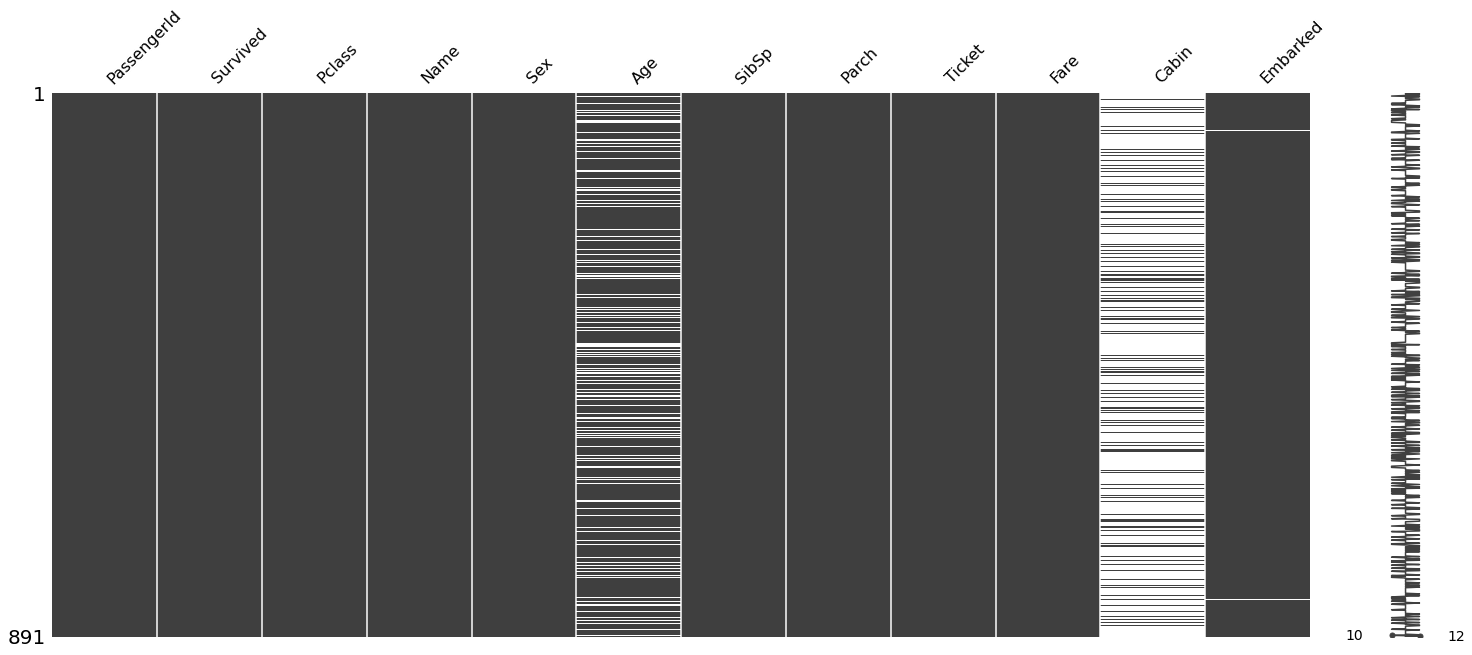

In [7]:
missingno.matrix(rawData)

## 상관계수
- 공분산

In [10]:
rawData.corr().style.background_gradient()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


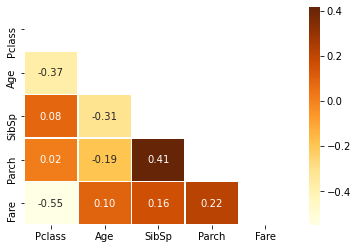

In [21]:
cor = rawData[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(
    cor, annot=True, fmt='.2f', cmap='YlOrBr', mask=mask, linewidths=0.5
)
plt.show()

# Y에 미치는 영향

## 생존자 정보 확인

0    549
1    342
Name: Survived, dtype: int64

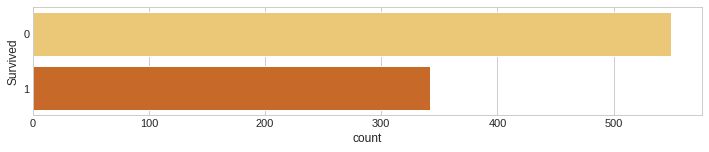

In [33]:
plt.style.use('seaborn-whitegrid')
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,2))
display(rawData.Survived.value_counts())
# sns.countplot(x='Survived', data=rawData)
sns.countplot(y='Survived', data=rawData, palette='YlOrBr')
plt.show()

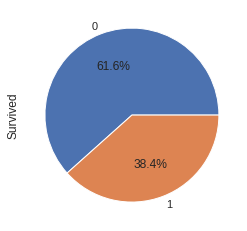

In [38]:
rawData.Survived.value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

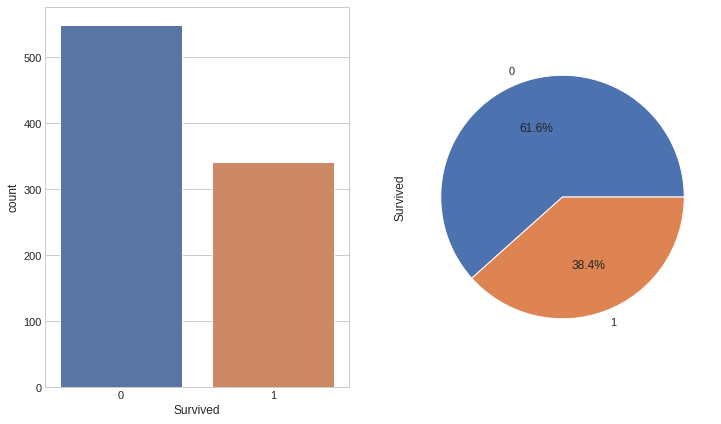

In [40]:
fig, ax = plt.subplots(1,2, figsize=(12,7))
sns.countplot(x='Survived', data=rawData, ax=ax[0])
rawData.Survived.value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1])
plt.show()

## Pclass가 생존에 미치는 영향

In [49]:
rawData.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [42]:
pd.crosstab(rawData.Pclass, rawData.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


/root/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


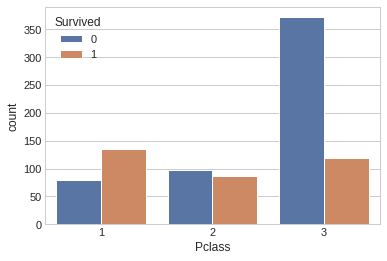

In [47]:
sns.countplot('Pclass', hue='Survived', data=rawData)
plt.show()

In [50]:
rawData.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

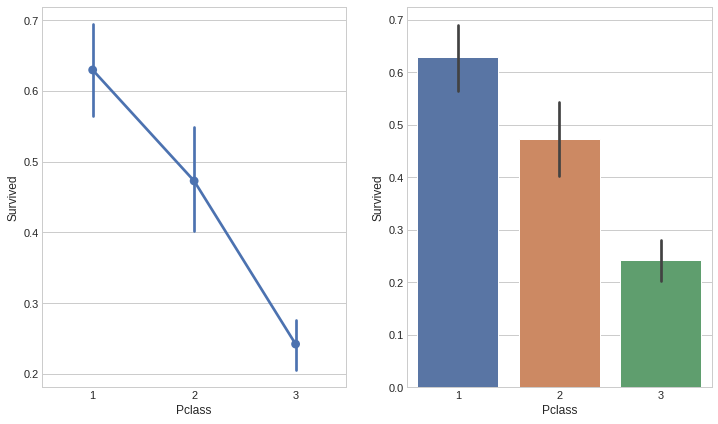

In [53]:
fig, ax = plt.subplots(1,2, figsize=(12,7))
sns.pointplot(x='Pclass', y='Survived', data=rawData, ax=ax[0])
sns.barplot(x='Pclass', y='Survived', data=rawData, ax=ax[1])
plt.show()

## 성별 생존여부

In [55]:
rawData.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [57]:
pd.crosstab(rawData.Sex, rawData.Survived, margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


/root/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


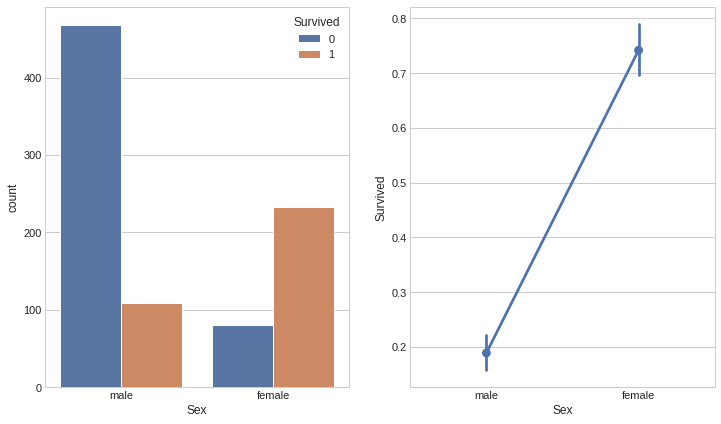

In [60]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.countplot('Sex', hue='Survived', data=rawData)

plt.subplot(1,2,2)
sns.pointplot(x='Sex', y='Survived', data=rawData)
plt.show()

## 나이에 따른 생존여부

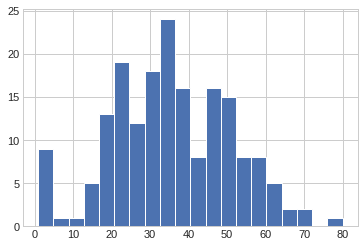

In [64]:
plt.hist('Age', data=rawData.dropna(), bins=20)
plt.show()

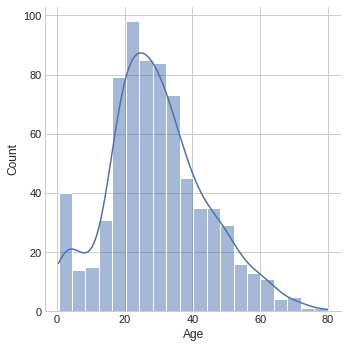

In [68]:
sns.displot(rawData['Age'].dropna(), bins=20, kde=True)
plt.show()